In [1]:
from domino.evaluate.evaluate import evaluate_sdms, run_sdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [7]:
dp = run_sdm.out(4258).load()
dp["gender_male"].mean()

0.023923444976076555

task: plot_evaluate_sdms, run_id=4359
Preparing dataframe...


  6%|▌         | 32/515 [00:00<00:14, 33.36it/s]

4258
0.0
4250
0.1


 12%|█▏        | 60/515 [00:01<00:13, 32.86it/s]

4284
0.0


 19%|█▉        | 100/515 [00:03<00:12, 32.69it/s]

4327
0.8


 21%|██        | 108/515 [00:03<00:12, 33.59it/s]

4331
0.7000000000000001
3813
0.1
3816
0.0


 22%|██▏       | 112/515 [00:03<00:11, 34.10it/s]

3818
0.0
3819
0.0


 25%|██▍       | 128/515 [00:03<00:11, 33.90it/s]

3840
0.6000000000000001
3828
0.6000000000000001


 26%|██▋       | 136/515 [00:04<00:11, 33.21it/s]

3834
0.8


 42%|████▏     | 216/515 [00:06<00:09, 32.47it/s]

3912
0.0


 43%|████▎     | 224/515 [00:06<00:08, 32.71it/s]

3913
0.2


 47%|████▋     | 240/515 [00:07<00:08, 33.23it/s]

3934
0.7000000000000001
3943
0.8
3944
0.8


 62%|██████▏   | 320/515 [00:09<00:05, 32.88it/s]

4004
0.0
4008
0.0


 68%|██████▊   | 348/515 [00:10<00:05, 32.80it/s]

4032
0.0
4133
0.0


 88%|████████▊ | 452/515 [00:13<00:01, 32.81it/s]

4132
0.0
4134
0.0
4212
0.0


 89%|████████▉ | 460/515 [00:14<00:01, 32.41it/s]

4140
0.2


 92%|█████████▏| 472/515 [00:14<00:01, 31.49it/s]

4151
0.6000000000000001


 94%|█████████▍| 484/515 [00:14<00:00, 31.52it/s]

4168
0.0


100%|██████████| 515/515 [00:15<00:00, 32.58it/s]

4199
0.7000000000000001
Plotting...


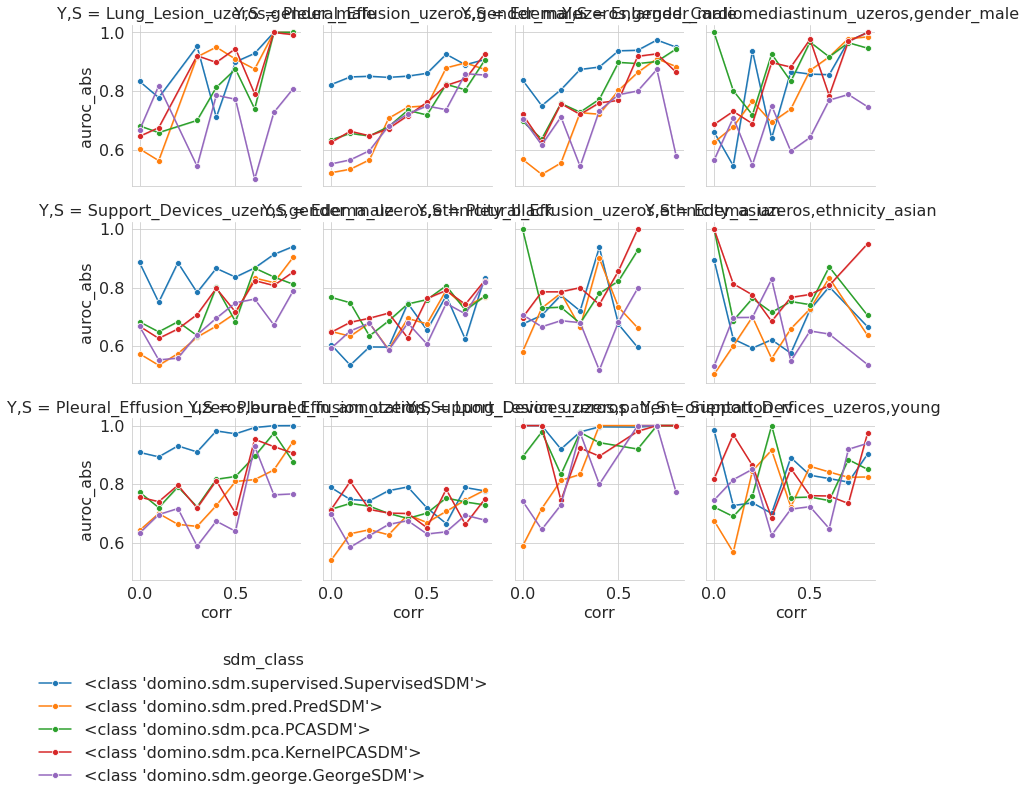

In [2]:
from domino.evaluate.evaluate import evaluate_sdms, run_sdm
from domino.vis.evaluate import plot_evaluate_sdms
plot_df = plot_evaluate_sdms([evaluate_sdms.out(4229), evaluate_sdms.out(3812)]).load()

In [3]:
plot_df.sort_values("auroc")

,sdm_class,target,correlate,corr,auroc,class_idx,slice_idx,run_id,auroc_abs,"Y,S"
2028,<class 'domino.sdm.pca.PCASDM'>,Enlarged_Cardiomediastinum_uzeros,gender_male,0.0,0.0,1,3,3910,1.0,"Enlarged_Cardiomediastinum_uzeros,gender_male"
4595,<class 'domino.sdm.pca.PCASDM'>,Lung_Lesion_uzeros,patient_orientation_rf,0.7,0.0,1,0,4159,1.0,"Lung_Lesion_uzeros,patient_orientation_rf"
1230,<class 'domino.sdm.pca.PCASDM'>,Lung_Lesion_uzeros,gender_male,0.7,0.0,1,0,3830,1.0,"Lung_Lesion_uzeros,gender_male"
3359,<class 'domino.sdm.pca.KernelPCASDM'>,Edema_uzeros,ethnicity_asian,0.0,0.0,1,4,4039,1.0,"Edema_uzeros,ethnicity_asian"
3348,<class 'domino.sdm.pca.PCASDM'>,Edema_uzeros,ethnicity_asian,0.0,0.0,1,3,4038,1.0,"Edema_uzeros,ethnicity_asian"
...,...,...,...,...,...,...,...,...,...,...
1258,<class 'domino.sdm.pred.PredSDM'>,Lung_Lesion_uzeros,gender_male,0.8,1.0,0,3,3834,1.0,"Lung_Lesion_uzeros,gender_male"
1257,<class 'domino.sdm.pred.PredSDM'>,Lung_Lesion_uzeros,gender_male,0.8,1.0,0,2,3834,1.0,"Lung_Lesion_uzeros,gender_male"
4586,<class 'domino.sdm.pred.PredSDM'>,Lung_Lesion_uzeros,patient_orientation_rf,0.7,1.0,1,1,4160,1.0,"Lung_Lesion_uzeros,patient_orientation_rf"
916,<class 'domino.sdm.supervised.SupervisedSDM'>,Lung_Lesion_uzeros,patient_orientation_rf,0.8,1.0,1,1,4327,1.0,"Lung_Lesion_uzeros,patient_orientation_rf"


In [9]:
dp = run_sdm.out(4321).load()
np.mean(dp["patient_orientation_rf"])


0.023965141612200435

In [24]:
from scipy.stats import pearsonr
df = evaluate_sdms.out(3812).load()

out = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    dp = run_sdm.out(row.run_id).load()
    inp = run_sdm.inp(row.run_id)
    target, correlate = inp["target"], inp["correlate"]
    out.append(
        {
            "corr": row["corr"],
            "run_id": row.run_id,
            "target": target, 
            "correlate": correlate,
            "new_corr": pearsonr(dp[target], dp[correlate])[0]
        }
    )
plot_df = pd.DataFrame(out)

100%|██████████| 412/412 [00:04<00:00, 85.73it/s]


<AxesSubplot:xlabel='corr', ylabel='new_corr'>

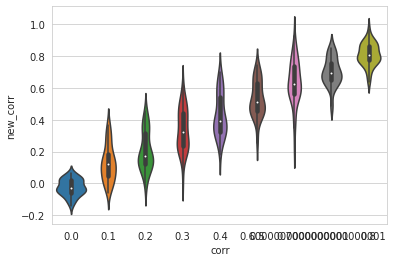

In [29]:
sns.set_style("whitegrid")
sns.violinplot(data=plot_df, x="corr", y="new_corr")

In [10]:
from meerkat.contrib.mimic import build_mimic_dp
out = build_mimic_dp(
    '/home/common/datasets/mimic/',
    gcp_project='hai-gcp-fine-grained',
)

Forbidden: 403 Access Denied: Table physionet-data:mimic_core.patients: User does not have permission to query table physionet-data:mimic_core.patients.

(job ID: f9cfa676-d908-4bba-876f-bb637ecc3f39)

                                                                                                                                                          -----Query Job SQL Follows-----                                                                                                                                                          

    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |
   1:
   2:            SELECT *
   3:            FROM `physionet-data.mimic_cxr.record_list` cxr_records
   4:            LEFT JOIN `physionet-data.mimic_cxr.study_list` cxr_studies
   5:                ON cxr_records.study_id = cxr_studies.study_id
   6:    
   7:            LEFT JOIN `physionet-data.mimic_cxr.chexpert` chexpert
   8:                ON cxr_records.study_id = chexpert.study_id
   9:        
  10:            LEFT JOIN `physionet-data.mimic_core.patients` patients
  11:                ON cxr_records.subject_id = patients.subject_id
  12:        
  13:            LEFT JOIN (SELECT dicom,StudyDate,ImageType,TableType,DistanceSourceToDetector,DistanceSourceToPatient,Exposure,ExposureTime,XRayTubeCurrent,FieldOfViewRotation,FieldOfViewOrigin,FieldOfViewHorizontalFlip,ViewPosition,PatientOrientation,BurnedInAnnotation,RequestingService,DetectorPrimaryAngle,DetectorElementPhysicalSize
  14:                FROM `physionet-data.mimic_cxr.dicom_metadata_string`) AS meta
  15:            ON cxr_records.dicom_id = meta.dicom
  16:        
    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |